In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime, timedelta
import gc
import pickle

In [27]:
df = pd.read_csv("data/btc_tx_2011_2013.csv", ) #13- 14 - 15 e bakalim corr var mi hangi featurelar arasi average shortest path length etc.
# flow bazli metrikler
# her biri icin graph olusturulup time seriese bagli graphlar
# makalelerdeki featurelar (stanford 2015 | Group work) aynilarini deneriz
# 100k nodes randomly sampled, multiple times. Per month and closure price, price changing return % 
# pearson spearman corrs

In [28]:
df

,from,to,datetime,amount
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,2009-01-09,50.000000
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,ea44e97271691990157559d0bdd9959e02790c34db6c00...,2009-01-12,10.000000
2,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,2009-01-12,40.000000
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,2009-01-12,30.000000
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,298ca2045d174f8a158961806ffc4ef96fad02d71a6b84...,2009-01-12,1.000000
...,...,...,...,...
66199068,7ebd2c87efead031e8b6aeecc1ef4032551d9580726a1f...,5c6684d182093e8a8cbf8434f6dbb6c0a69684885b5c22...,2014-01-02,0.610000
66199069,6556332ea7196ac64e29d78576a7a6cdc4cbfecbd29f47...,653cab2118c19528ef711d45e5af39971f00e307da3ef4...,2014-01-02,0.026032
66199070,ddce84f4e7da169c0d470cd8c090e2c6be862d458b4f1c...,653cab2118c19528ef711d45e5af39971f00e307da3ef4...,2014-01-02,0.009715
66199071,e649a0bc622c6c499e81f85bae2ba95b588a7148b84509...,86985d45d89f3ad367cbbb96b3a1b2119ed8ed103be124...,2014-01-02,0.023515


In [37]:
x = nx.from_pandas_edgelist(df.loc[142450:142500],source="from",target ="to",edge_attr='amount', create_using=nx.DiGraph())

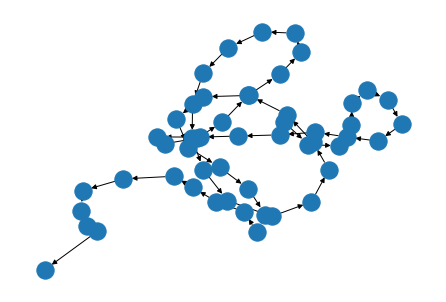

In [38]:
nx.draw(x)

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data["datetime"]=pd.to_datetime(data["datetime"])
data["datetime"] = data["datetime"].dt.date

In [ ]:
data

In [ ]:
df = data.sort_values(by= ["datetime"])

In [ ]:
df.to_csv('Sorted.csv')

In [3]:
df = pd.read_csv("Sorted.csv")

In [4]:
df["datetime"]=pd.to_datetime(df["datetime"]).dt.date

In [6]:
sliced = slice_by_weeks(df.drop(0))


In [45]:
with open('slices2.pkl', 'wb') as f:
    pickle.dump(sliced[150:], f)


In [2]:
def slice_by_weeks(df):
    groups = []
    prev= df["datetime"].iloc[0]
    prev_index = 0
    for i in range(df.shape[0]):
        if (df["datetime"].iloc[i] - prev).days >= 7:
            groups.append(df.iloc[prev_index:i])
            prev = df["datetime"].iloc[i] - timedelta(df["datetime"].iloc[i].weekday())
            prev_index=i
    return groups

def createGraph(data): # directed graph
    G=nx.from_pandas_edgelist(data,source="tx_hash_from",target ="tx_hash_to", edge_attr="amount_bitcoins", create_using=nx.DiGraph())
    return G

In [2]:
with open('slices.pkl', 'rb') as f:
    sliced = pickle.load(f)

In [13]:
sliced[58]

,tx_hash_from,tx_hash_to,datetime,amount_bitcoins
3476313,e1d0123de15f4047d077570b535b6e7d7d79822b7e517b...,52e5e912536f92a78b3fdd57502f62b9da82b026650fce...,2011-11-07,0.350000
3476314,e1d0123de15f4047d077570b535b6e7d7d79822b7e517b...,7c71cf7f6241dae41c44410a0dbf8a31f2316b4e129e18...,2011-11-07,1.470000
3476315,f88acf2beec18f9961020c5ad39286a32820d6d0cc97d4...,075fc735bd4b6c3d5053c26511de11f1702b5fcb595a14...,2011-11-07,59.224471
3476316,858ae22c3620264fd01fb5db50ff29b0c97f924be4d601...,83a12a3fa61fa77323dce6c0fdf289bd7645042f038b0f...,2011-11-07,11.000000
3476317,81d79501cea191195e9c910009d8574c634c92c7b53786...,0a22f6f6847a024b0cb428098767cbbfef5d40c76b929a...,2011-11-07,54.312000
...,...,...,...,...
3561055,bc07634991355a8cac863de9c7d1331ac6eb899a7bda0b...,def8685540bdb8496467f7827c4cd06b2404c44edd63bc...,2011-11-13,30.972697
3561056,dab0b396f5877774ae77b498e9f5dc091b713d0f87150b...,c09dd5667b539f337fbe8cfc3dacefb55e50b44d8f5259...,2011-11-13,2.197172
3561057,dab0b396f5877774ae77b498e9f5dc091b713d0f87150b...,7b01b19637714246ee925ea2d0069bd3441d211fb871f2...,2011-11-13,29.656291
3561058,5f854452828e0c9e21dca466876d489e1020b92c4b49fa...,dc6ebef2e7eb924f3ba63244f934623e513abfe5fa4f7c...,2011-11-13,0.160000


In [12]:
datetime(2011,11,6).date().weekday()

6

In [4]:
len(sliced)

170

In [10]:
graphs = []
index =130
for i in sliced[150:]:
    graphs.append(createGraph(i))
    index+=1
    print(index, end="\r")

In [11]:
with open('graphs150-170.pkl', 'wb') as f:
    pickle.dump(graphs, f)

In [ ]:
df.drop(0)

In [ ]:
datetime(2009,1,12).weekday()

In [16]:
sliced[169]

,tx_hash_from,tx_hash_to,datetime,amount_bitcoins
65123430,c8991353a7498d3b96be10d01df0ab6e3313d867df5ec2...,324c6d807328caf13400606687b309cebef9e36aac18d1...,2013-12-23,0.090000
65123431,f2d184b164d848aae32ba6d1cd47ea54911514ca2e5f68...,85c6192608655c2de370ab70bfed6021ac41e9d360007e...,2013-12-23,0.323200
65123432,f2d184b164d848aae32ba6d1cd47ea54911514ca2e5f68...,97fcd28f0905fcaf3db6a9e0dd679239b50193ddb10270...,2013-12-23,0.361200
65123433,0205a3387132ed3ba282de64141020141efc299e608753...,2c0d995cf888d2572615dbb0ee2616f2ee1b3d006730e0...,2013-12-23,0.103400
65123434,0205a3387132ed3ba282de64141020141efc299e608753...,d099e61a90e0770e920989f255ee46800eda8fb4f97445...,2013-12-23,0.146500
...,...,...,...,...
65894508,41a850f9c8fdd48a9a776a09e3d96d0c77b38b4589e0f4...,9ec8f103d8fe31679d3771e02368ca53e2d9ffcf4da57a...,2013-12-29,0.130729
65894509,dc2db604fb5f8740005fc56481e9a2c0f70c21eba92bd4...,3da517409360d44a1399594f6c372c2c3113ca7872a72f...,2013-12-29,0.000588
65894510,cd1f9caac176b2e10b27fd95e3f834cef94ca00d401979...,4b3ddf880235bf0302bb56b01d433bb1983e2e1f576d64...,2013-12-29,0.040000
65894511,0d61a5f5c38856e9ba0b6c56617b1f9c9b155fdec95281...,eb4f563612a352727ca7cb1397259f18ee88e122c93e2b...,2013-12-29,0.040000


In [51]:
metrics = pd.read_csv("data/full_df.csv")

In [58]:
metrics.head()

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229


In [53]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              112 non-null    object 
 1   Close                             112 non-null    float64
 2   Open                              112 non-null    float64
 3   High                              112 non-null    float64
 4   Low                               112 non-null    float64
 5   Vol                               112 non-null    float64
 6   Change %                          112 non-null    float64
 7   average_clustering                112 non-null    float64
 8   density                           112 non-null    float64
 9   number_of_edges                   112 non-null    int64  
 10  number_of_nodes                   112 non-null    int64  
 11  degree_assortativity_coefficient  112 non-null    float64
dtypes: float

In [54]:
metrics.describe()

,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000
mean,6.462500,6.346429,7.328571,5.642857,291652.142857,0.055268,0.011635,0.000010,5.471688e+05,293643.955357,0.003433
std,4.740683,4.728425,5.736833,4.214597,188404.656402,0.260062,0.004771,0.000008,3.032209e+05,157702.195739,0.038659
min,0.200000,0.200000,0.200000,0.100000,1020.000000,-0.520000,0.004321,0.000003,7.604600e+04,49316.000000,-0.054024
25%,3.000000,2.950000,3.175000,2.350000,167887.500000,-0.050000,0.007369,0.000004,3.631032e+05,197985.750000,-0.019837
50%,5.250000,5.150000,5.750000,4.800000,266270.000000,0.010000,0.012152,0.000006,5.498635e+05,297209.000000,-0.009300
75%,10.675000,10.525000,11.800000,9.625000,386212.500000,0.095000,0.013889,0.000009,8.109038e+05,425854.750000,0.018731
max,18.900000,18.900000,31.900000,16.900000,871360.000000,1.280000,0.025024,0.000031,1.209759e+06,676350.000000,0.161263


In [55]:
metrics.corr()

,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
Close,1.000000,0.944490,0.943298,0.961904,0.152676,0.062113,0.148134,-0.642518,0.554106,0.564046,-0.454464
Open,0.944490,1.000000,0.945771,0.965984,0.176828,-0.193182,0.181830,-0.648814,0.561813,0.572034,-0.474564
High,0.943298,0.945771,1.000000,0.898777,0.208718,-0.021822,0.090960,-0.586300,0.464703,0.471190,-0.440730
Low,0.961904,0.965984,0.898777,1.000000,0.105029,-0.099466,0.191421,-0.665820,0.612381,0.624568,-0.465122
Vol,0.152676,0.176828,0.208718,0.105029,1.000000,-0.078558,0.568193,-0.512150,0.429074,0.406612,-0.207826
Change %,0.062113,-0.193182,-0.021822,-0.099466,-0.078558,1.000000,-0.175025,0.114418,-0.175642,-0.171557,0.132299
average_clustering,0.148134,0.181830,0.090960,0.191421,0.568193,-0.175025,1.000000,-0.667583,0.608473,0.579859,-0.176748
density,-0.642518,-0.648814,-0.586300,-0.665820,-0.512150,0.114418,-0.667583,1.000000,-0.889739,-0.880791,0.282679
number_of_edges,0.554106,0.561813,0.464703,0.612381,0.429074,-0.175642,0.608473,-0.889739,1.000000,0.998008,-0.236924
number_of_nodes,0.564046,0.572034,0.471190,0.624568,0.406612,-0.171557,0.579859,-0.880791,0.998008,1.000000,-0.243222


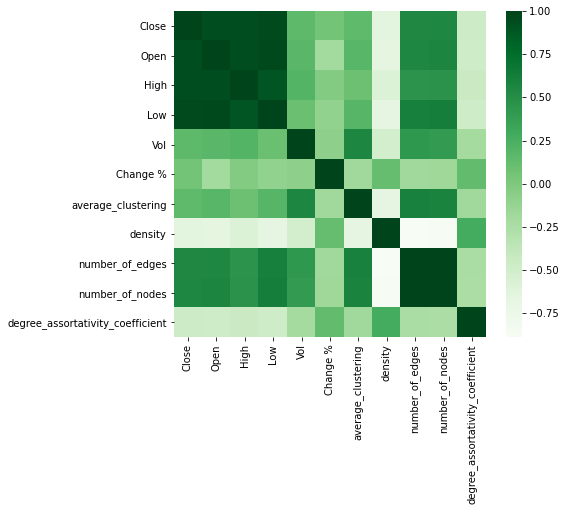

In [56]:
import seaborn as sns
corr = metrics.corr()

plt.figure(figsize=(7,6))
_ = sns.heatmap(corr, cmap="Greens")